# Regression Machine Learning Case Study: Boston housing price

<p style="text-align: justify">How do you work through a predictive modeling machine learning problem end-to-end? In this notebook, we work through a case study regression predictive modeling problem in Python including each step of the applied machine learning process. This project covers the following aspects:</p>

<ul>
<li>How to work through a regression predictive modeling problem end-to-end.</li>
<li>How to use data transforms to improve model performance.</li>
<li>How to use algorithm tuning to improve model performance.</li>
<li>How to use ensemble methods and tuning of ensemble methods to improve model performance.</li>
</ul>

<p style="text-align: justify">For this project we will investigate the <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data">Boston House Price</a> dataset. Each record in the database
describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are defined as follows (taken from the <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/housing/">UCI Machine Learning Repository</a>):</p>

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per &#36;10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: $1000(Bk - 0:63)^2$ where $Bk$ is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in &#36;1000s

We can see that the input attributes have a mixture of units, which may require normalization of the features.

## Load the dataset 

Let's start off by loading the libraries required for this project.

In [1]:
# Load libraries

# numpy 
import numpy as np

# matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm

# pandas 
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix

# standardization
from sklearn.preprocessing import StandardScaler

# test harness
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

# performace metrics
from sklearn.metrics import mean_squared_error

C:\Users\EC-PM-3\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<p style="text-align: justify">We can now load the dataset that we downloaded from the UCI Machine Learning repository website.</p>

In [2]:
# Load dataset
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=names)

<p style="text-align: justify">The short names are specified for each attribute so that we can reference
them clearly later. We can see that attributes are delimited by whitespace rather than commas in this file, and we indicate this to <em>read_csv()</em> function via the "delim_whitespace" argument. We now have our data loaded.</p>

## Analyze data

<p style="text-align: justify">We can now take a closer look at our loaded data. Let's start off by confirming the dimensions of the dataset, e.g. the number of rows and columns. We have 506 instances to work with and can conrm the data has 14 attributes including the output attribute MEDV.</p>

In [3]:
#shape
print(dataset.shape)

(506, 14)


<p style="text-align: justify">Let's also look at the data types of each attribute. We can see that all of the attributes are numeric, mostly real values (float) and some have been interpreted as integers (int).</p>

In [4]:
# types
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


<p style="text-align: justify">Let's now take a peek at the first 20 rows of the data. We can confirm that the scales for the attributes are all over the place because of the differing units. We may benefit from some transforms later on.</p>

In [5]:
#head
print(dataset.head(20))

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
12  0.09378  12.5   7.87 

<p style="text-align: justify">Let's summarize the distribution of each attribute. We now have a better feeling for how different the attributes are. The min and max values as well are the means vary a lot. We are likely going to get better results by rescaling the data in some way. </p>

In [6]:
# descriptions
set_option('precision', 1)
print(dataset.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


<p style="text-align: justify">Now, let's now take a look at the correlation between all of the numeric attributes. This is interesting. We can see that many of the attributes have a strong correlation (e.g. > 0.70 or < -0.70). For example:</p>

<ul>
    <li>NOX and INDUS with 0.77.</li>
    <li>DIS and INDUS with -0.71.</li>
    <li>TAX and INDUS with 0.72.</li>
    <li>AGE and NOX with 0.73.</li>
    <li>DIS and NOX with -0.78.</li>
</ul>

<p style="text-align: justify">It also looks like LSTAT has a good negative correlation with the output variable MEDV with a value of -0.74.</p>

In [7]:
# correlation
set_option('precision', 2)
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

## Data visualization

<p style="text-align: justify">Let's look at visualizations of individual attributes. It is often useful to look at your data
using multiple different visualizations in order to spark ideas. Let's look at histograms of each attribute to get a sense of the data distributions.</p>

<p style="text-align: justify">We can see that some attributes may have an exponential distribution, such as CRIM, ZN, AGE and B. We can see that others may have a bimodal distribution such as RAD and TAX.</p>

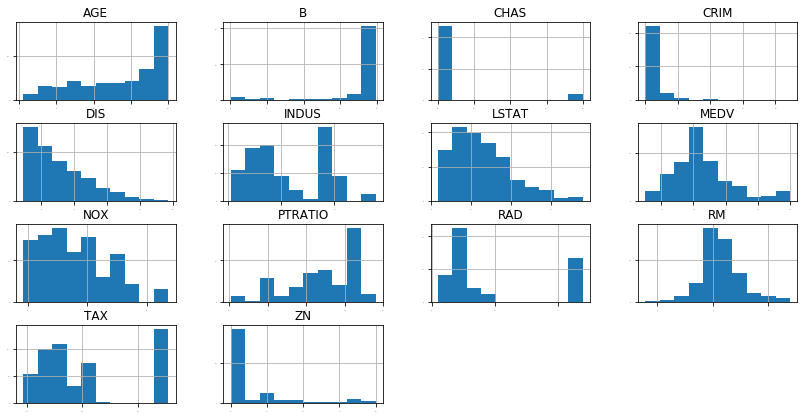

In [8]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(14,7))
plt.show()

<p style="text-align: justify">Let's look at the same distributions using density plots that smooth them out a bit.</p>

<p style="text-align: justify">This perhaps adds more evidence to our suspicion about possible exponential and bimodal
distributions. It also looks like NOX, RM and LSTAT may be skewed Gaussian distributions, which might be helpful later with transforms.</p>

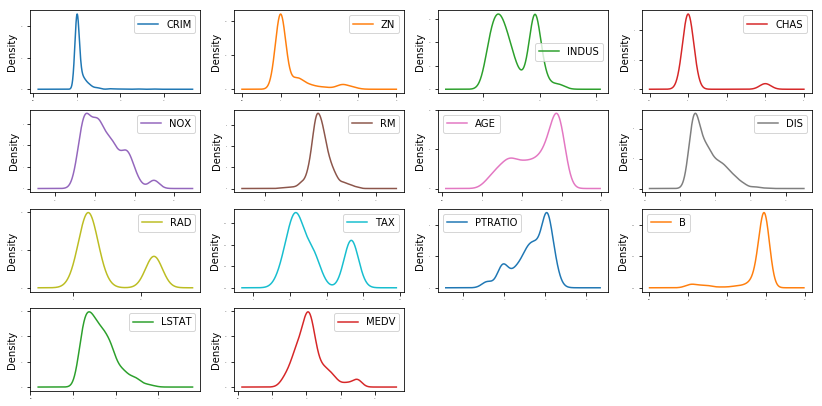

In [9]:
#density plots
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=1, figsize=(14,7))
plt.show()

<p style="text-align: justify">Let's look at the data with box and whisker plots of each attribute.</p>

<p style="text-align: justify">This helps point out the skew in many distributions so much so that data looks like outliers (e.g. beyond the whisker of the plots).</p>

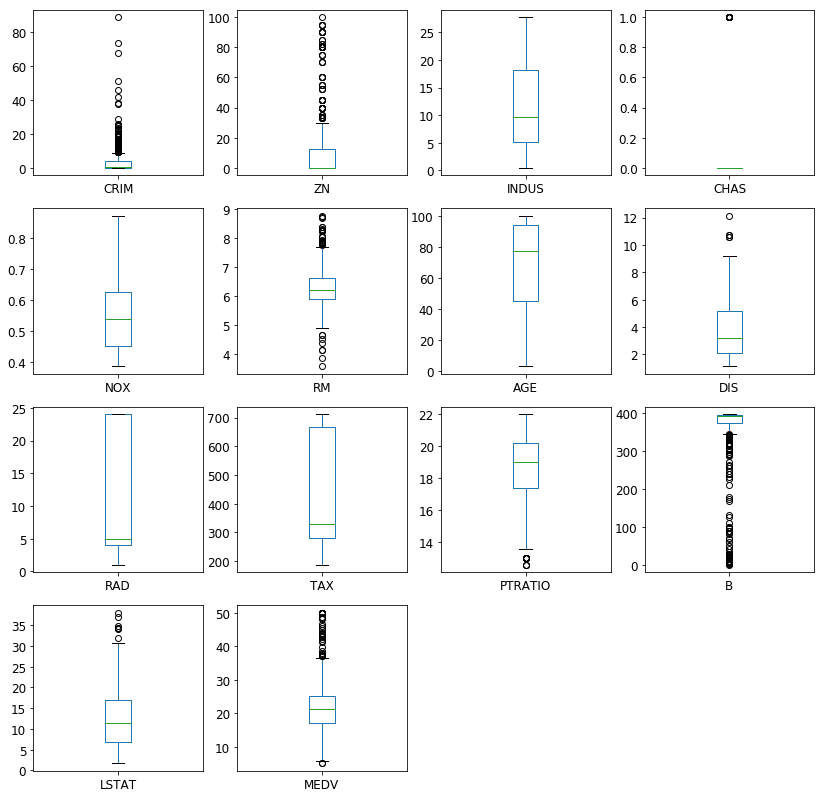

In [10]:
#box whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=12, figsize =(14,14))
plt.show()

<p style="text-align: justify">Let's look at some visualizations of the interactions between variables. The best place to start
is a scatter plot matrix.</p>

<p style="text-align: justify">We can see that some of the higher correlated attributes do show good structure in their
relationship. Not linear, but nice predictable curved relationships.</p>

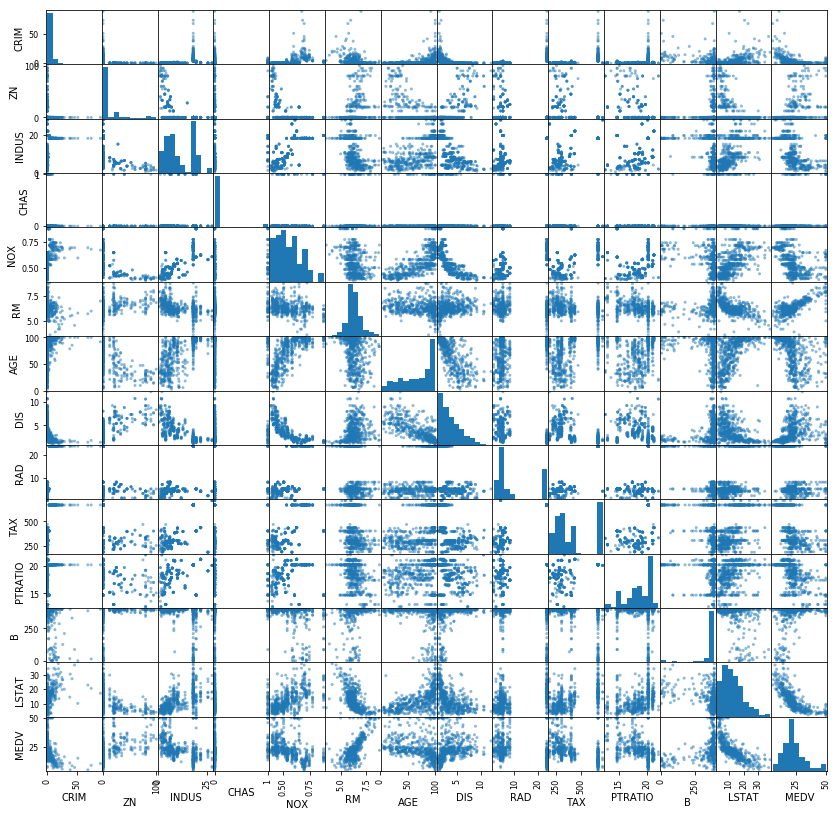

In [11]:
#scatterplot matrix
scatter_matrix(dataset, figsize = (14,14))
plt.show()

<p style="text-align: justify">Let's also visualize the correlations between the attributes.</p>

<p style="text-align: justify">The dark red color shows positive correlation whereas the dark blue color shows negative correlation. We can also see some dark red and dark blue that suggest candidates for removal to better improve accuracy of models later on.</p>


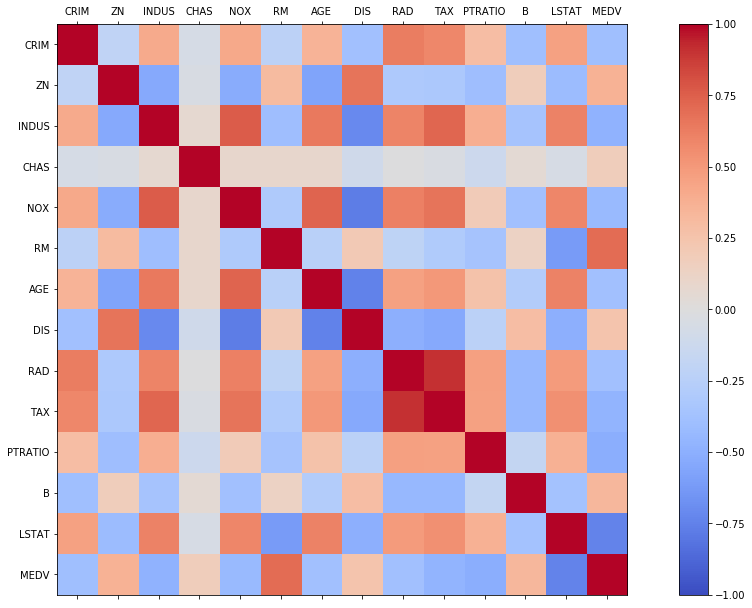

In [12]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none',cmap=cm.coolwarm)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
fig.set_size_inches(18.5, 10.5)
plt.show()

<p style="text-align: justify">There is a lot of structure in this dataset. We need to think about transforms that we could use
later to better expose the structure which in turn may improve modeling accuracy. So far it would be worth trying:</p>

<ul>
    <li>Feature selection and removing the most correlated attributes.</li>
    <li>Normalizing the dataset to reduce the effect of differing scales.</li>
    <li>Standardizing the dataset to reduce the effects of differing distributions.</li>
</ul>

<p style="text-align: justify">With lots of additional time I would also explore the possibility of binning (discretization)
of the data. This can often improve accuracy for decision tree algorithms.</p>

## Validation dataset

It is a good idea to use a validation hold-out set. This is a sample of the data that we hold back from our analysis and modeling. We use it right at the end of our project to confirm the accuracy of our final model. It is a smoke test that we can use to see if we messed up and to give us confidence on our estimates of accuracy on unseen data. We will use 80% of the dataset
for modeling and hold back 20% for validation.

In [13]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

## Evaluate algorithms: Baseline

<p style="text-align: justify">We have no idea what algorithms will do well on this problem. Gut feel suggests regression algorithms like Linear Regression and ElasticNet may do well. It is also possible that decision trees and even SVM may do well. With no proper idea in mind, let's design our test harness. We will use a <b>10-fold cross validation</b>. The dataset is not too small and this is a good standard test harness configuration. We will evaluate algorithms using the <b>Mean Squared Error (MSE)</b> metric. MSE will give a gross idea of how wrong all predictions are (0 is perfect).</p>

In [14]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

<p style="text-align: justify">Let's create a baseline of performance on this problem and spot-check a number of different algorithms. We will select a suite of different algorithms capable of working on this regression problem. The six algorithms selected include:</p>

<ul>
    <li><b>Linear Algorithms</b>: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet (EN).</li>
    <li><b>Nonlinear Algorithms</b>: Classification and Regression Trees (CART), Support Vector Regression (SVR) and <em>k</em>-Nearest Neighbors (KNN). </li>
</ul>

In [15]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

<p style="text-align: justify">The algorithms all use default tuning parameters. Let's compare the algorithms. We will
display the mean and standard deviation of MSE for each algorithm as we calculate it and collect the results for use later.</p>

In [16]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -24.306055 (10.338123)
SVR: -85.518342 (31.994798)


<p style="text-align: justify">It looks like LR has the lowest MSE, followed closely by CART.</p>

<p style="text-align: justify">Let's take a look at the distribution of scores across all cross validation folds by algorithm.</p>

<p style="text-align: justify">We can see similar distributions for the regression algorithms and perhaps a tighter distribution of scores for CART.</p>

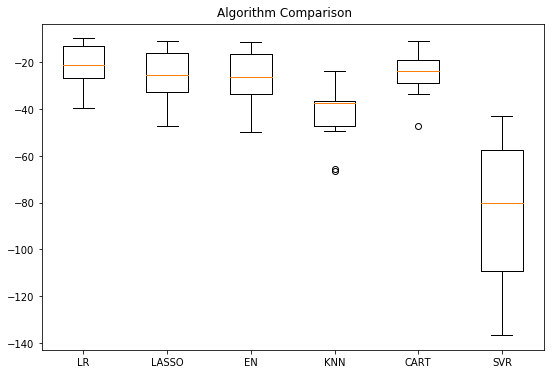

In [17]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison', y=0.92)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(9, 6)
plt.show()

<p style="text-align: justify">The different scales of the data is probably hurting the skill of all of the algorithms, and
perhaps more so for SVR and KNN. In the next section we will look at running the same algorithms using a standardized copy of the data.</p>

## Evaluate algorithms: Standardization

<p style="text-align: justify">We suspect that the differing scales of the raw data may be negatively impacting the skill of some of the algorithms. Let's evaluate the same algorithms with a standardized copy of the dataset. This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of 1. We also need to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.</p>

In [18]:
#Standardize dataset
pipelines = []

pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))

pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))

pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))

pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

#Re-evaluate standardized data
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -26.461122 (12.726509)
ScaledSVR: -29.633086 (17.009186)


<p style="text-align: justify">Running the example provides a list of mean squared errors. We can see that scaling did
have an effect on KNN, driving the error lower than the other models.</p>

<p style="text-align: justify">Let's take a look at the distribution of the scores across the cross validation folds. We can see that KNN has both a tight distribution of error and has the lowest score.</p>

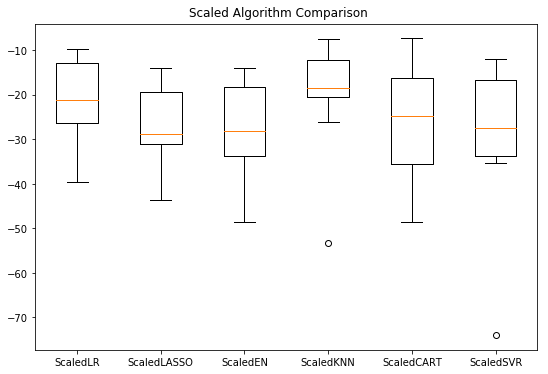

In [19]:
#Compare algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison', y=0.92)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(9, 6)
plt.show()

## Improve Results With Tuning

<p style="text-align: justify">We know from the results in the previous section that KNN achieves good results on a scaled version of the dataset. But can it do better. The default value for the number of neighbors in KNN is 7. We can use a grid search to try a set of different numbers of neighbors and see if we can improve the score. The below example tries odd <em>k</em> values from 1 to 21, an arbitrary range covering a known good value of 7. Each <em>k</em> value ("n_neighbors") is evaluated using 10-fold cross validation on a standardized copy of the training dataset.</p>

In [20]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

<p style="text-align: justify">We can display the mean and standard deviation scores as well as the best performing value
for k below.</p>

<p style="text-align: justify">We can see that the best for k ("n_neighbors") is 3 providing a mean squared error of
-18.172137, the best so far.</p>

In [21]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.172137 using {'n_neighbors': 3}
-20.208663 (15.029652) with: {'n_neighbors': 1}
-18.172137 (12.950570) with: {'n_neighbors': 3}
-20.131163 (12.203697) with: {'n_neighbors': 5}
-20.575845 (12.345886) with: {'n_neighbors': 7}
-20.368264 (11.621738) with: {'n_neighbors': 9}
-21.009204 (11.610012) with: {'n_neighbors': 11}
-21.151809 (11.943318) with: {'n_neighbors': 13}
-21.557400 (11.536339) with: {'n_neighbors': 15}
-22.789938 (11.566861) with: {'n_neighbors': 17}
-23.871873 (11.340389) with: {'n_neighbors': 19}
-24.361362 (11.914786) with: {'n_neighbors': 21}


## Ensemble Methods

<p style="text-align: justify">Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. In this section we will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods:</p>

<ul>
    <li><b>Boosting Methods</b>: AdaBoost (AB) and Gradient Boosting (GBM).</li>
    <li><b>Bagging Methods</b>: Random Forests (RF) and Extra Trees (ET).</li>
</ul>

<p style="text-align: justify">We will use the same test harness as before, 10-fold cross validation and pipelines that standardize the training data for each fold.</p>

In [22]:
# ensembles
ensembles = []

ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))

ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))

ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))

results = []
names = []
for name,model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -15.186046 (6.402651)
ScaledGBM: -10.262403 (4.590534)
ScaledRF: -13.809323 (6.863966)
ScaledET: -10.078066 (5.148114)


<p style="text-align: justify">Running the example calculates the mean squared error for each method using the default parameters. We can see that we're generally getting better scores than our linear and nonlinear algorithms in previous sections.</p>

<p style="text-align: justify">We can also plot the distribution of scores across the cross validation folds.</p>

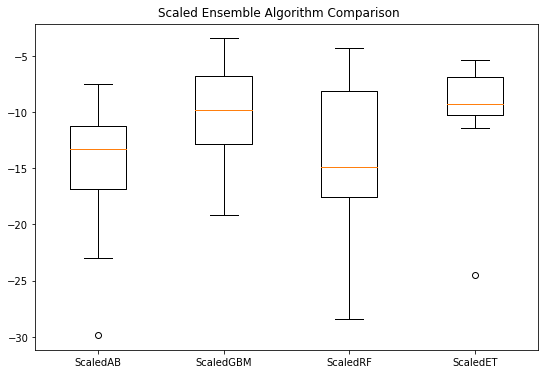

In [23]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison', y=0.92)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(9, 6)
plt.show()

<p style="text-align: justify">It looks like Gradient Boosting has a better mean score, it also looks like Extra Trees has a similar distribution and perhaps a better median score.</p>

<p style="text-align: justify">We can probably do better, given that the ensemble techniques used the default parameters. In the next section we will look at tuning the Gradient Boosting to further lift the performance.</p>

## Tune Ensemble Methods

<p style="text-align: justify">The default number of boosting stages to perform ("n_estimators") is 100. This is a good candidate parameter of Gradient Boosting to tune. Often, the larger the number of boosting stages, the better the performance but the longer the training time. In this section, we will look at tuning the number of stages for gradient boosting. Below, we define a parameter grid "n_estimators" values from 50 to 400 in increments of 50. Each setting is evaluated using 10-fold
cross validation.</p>

In [24]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

<p style="text-align: justify">As before, we can summarize the best configuration and get an idea of how performance
changed with each different configuration.</p>

<p style="text-align: justify">We can see that the best configuration is "n_estimators"=400 resulting in a mean squared
error of -9.356471, about 0.65 units better than the untuned method.</p>

In [25]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.356471 using {'n_estimators': 400}
-10.812167 (4.724394) with: {'n_estimators': 50}
-10.040857 (4.441758) with: {'n_estimators': 100}
-9.694096 (4.275762) with: {'n_estimators': 150}
-9.539706 (4.270637) with: {'n_estimators': 200}
-9.448764 (4.262603) with: {'n_estimators': 250}
-9.429946 (4.273791) with: {'n_estimators': 300}
-9.369824 (4.254108) with: {'n_estimators': 350}
-9.356471 (4.267837) with: {'n_estimators': 400}


## Finalize Model

<p style="text-align: justify">In this section we will finalize the gradient boosting model and evaluate it on our hold out validation dataset. First we need to prepare the model and train it on the entire training dataset. This includes standardizing the training dataset before training.</p>

In [26]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=7,
             subsample=1.0, verbose=0, warm_start=False)

<p style="text-align: justify">We can then scale the inputs for the validation dataset and generate predictions.</p>

In [27]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.875252079219903


<p style="text-align: justify">We can see that the estimated mean squared error is 11.8, close to our estimate of -9.3.</p>

## Summary and extensions

In this study, we covered a regression predictive modeling machine learning problem from end-to-end using Python. Specifically, the steps covered were: 

<ul>
    <li>Problem Definition with the Boston house prices prediction.</li>
    <li>Data visualization and analysis of the attributes.</li>
    <li>Evaluation of different linear and non-linear algorithms on training set.</li>
    <li>Algorithm tuning.</li>
    <li>Selection of the best model, with training on whole dataset.</li>
</ul>

This section lists some ideas for extending the tutorial that you may wish to explore.

<p style="text-align: justify">1. <b>Data Transforms</b>. In the current notebook, standardization has been considered. Normalization of the features (between 0 and 1) could also be experimented to see whether there is some improvement with the different models.</p>

<p style="text-align: justify">2. <b>Feature selection</b>. Here, we fit the models using all features. However, from what has been seen from data analysis and visualization, some of the features are well correlated. It could be interesting to remove these features from the models training as they present some collinearity and redundancy, which might affect the accuracy of the regression models.</p>